<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2022S2/blob/main/A2_2022S2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Avaliação N2 
***
Faça os exercícios propostos e em seguida responda ao **questionário no Moodle**.

*Boa prova!*

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# **Exercício 1.** Clustering Kmédias, Segmentando Países pela Força de Trabalho 
Questões no Moodle **Q1, Q2, Q3**

Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando uma clusterização **Kmédias**.

In [61]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [62]:
df.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

In [63]:
df.shape

(26, 10)

## Preparação dos dados

Normalize os dados empregando o `StandardScaler` (melhor) ou `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis para a construção do modelo. Para certificar-se que a normalização foi feita corretamente verifique `sum(sum(X))`.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(columns='Country'))
X = scaler.transform(df.drop(columns='Country'))

X[0:5]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507]])

In [65]:
sum(sum(X))

2.275957200481571e-14

## Número de Clusters

**Q1**. Qual ao valor médio de silhueta para o melhor número de clusters `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state=1234` no kmédias e nenhum outro parâmetro.

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics 

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Sabemos que esse conjunto, independente do valor que você obteve no item anterior é 3. Faça assim a clusterizção para 3 clusters.

**Q2**. Examine quantos elementos você encontra em cada cluster e quais os valores de médios, o centróide ou valores típicos de cada cluster.  

> Empregue `random_state=1234` no kmédias e nenhum outro parâmetro.

In [67]:
from sklearn.cluster import KMeans

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3, random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]
[[ 2.17579264 -0.33695415 -1.87839051 -0.83405766 -1.79639567 -1.17191669
   0.33913963 -1.58626377 -1.40190152]
 [-0.49645361 -0.46398587  0.06891443  0.02997395  0.27708668  0.68508261
   0.42695257  0.42212305  0.01198006]
 [ 0.20226856  1.20494805  0.6475058   0.2889414   0.13654287 -1.06365309
  -1.12123713 -0.28502536  0.57343195]]


In [68]:
# Existem várias maneiras de 'contar' e você poderia fazer até mesmo inspecionando diretamente os valores
import collections 

collections.Counter(labels)

Counter({1: 16, 0: 3, 2: 7})

## Analisando os Grupos



**Q3**. Analise os valores médios dos grupos e os países pertencentes a cada grupo. Há grupos que se destacam com um percentual maior (ou menor) da força de trabalho em alguma categoria? Quais países fazem parte de cada grupo?



Primeiro, vamos adicionar uma coluna com os rótulos de Cluster em `df`:

In [69]:
df['Cluster'] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


## Solução A. Veja através dos centróides

Os centróides tem a média dos valores de cada grupo. O grupo 0 é o mais mão de obra em agricultura

In [70]:
df_centroids = pd.DataFrame(centroids,columns=df.columns[1:-1])
df_centroids

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,2.175793,-0.336954,-1.878391,-0.834058,-1.796396,-1.171917,0.339140,-1.586264,-1.401902
1,-0.496454,-0.463986,0.068914,0.029974,0.277087,0.685083,0.426953,0.422123,0.011980
2,0.202269,1.204948,0.647506,0.288941,0.136543,-1.063653,-1.121237,-0.285025,0.573432


O grupo 2 é o com mais mão de obra em manufatura (você pode ver na tabela acima ou aqui):

In [71]:
display( df_centroids.nlargest(1,'Man') )
print( list( df[ df.Cluster == df_centroids.nlargest(1,'Man').index[0] ].Country ) )
# o mesmo que
# print( list( df[ df.Cluster == 2 ) )


,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
2,0.202269,1.204948,0.647506,0.288941,0.136543,-1.063653,-1.121237,-0.285025,0.573432


['Bulgaria', 'Czechoslovakia', 'E. Germany', 'Hungary', 'Poland', 'Rumania', 'USSR']


O grupo 0 é o com mais mão de obra em agricultura (você pode ver na tabela acima ou aqui):

In [72]:
display( df_centroids.nlargest(1,'Agr') )
print( list( df[ df.Cluster == df_centroids.nlargest(1,'Agr').index[0] ].Country ) )
# o mesmo que
# print( list( df[ df.Cluster == 0 ) )

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,2.175793,-0.336954,-1.878391,-0.834058,-1.796396,-1.171917,0.33914,-1.586264,-1.401902


['Greece', 'Turkey', 'Yugoslavia']


## Solução B. Veja através dos próprios grupos

Ou você pode com a informação de Cluster no dataframe, verificar a média dos grupos para cada atributo (Agr, Man etc.), identificar qual é mais intensivo e, então, listar os nomes dos países.

In [73]:
df.groupby('Cluster')[['Agr','Man']].mean()

,Agr,Man
Cluster,,
0,52.300000,14.100000
1,11.562500,27.481250
2,22.214286,31.457143


In [74]:
df_clusters = df.groupby('Cluster').mean().reset_index()
df_clusters

,Cluster,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


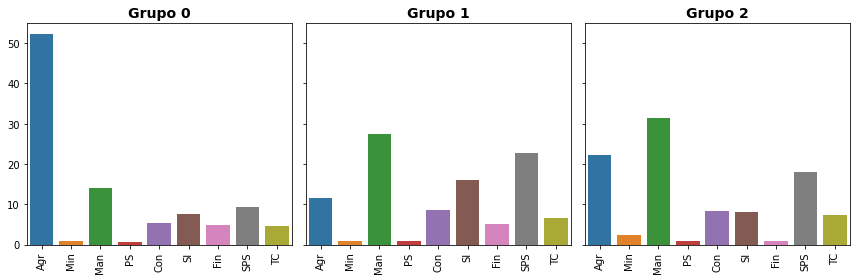

In [75]:
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

for i in range(len(df_clusters)):
  sns.barplot(data=df_clusters[df_clusters.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i), fontsize=14, weight='bold')
  ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



In [76]:
df.groupby(['Cluster','Country']).Country.count()

Cluster  Country       
0        Greece            1
         Turkey            1
         Yugoslavia        1
1        Austria           1
         Belgium           1
         Denmark           1
         Finland           1
         France            1
         Ireland           1
         Italy             1
         Luxembourg        1
         Netherlands       1
         Norway            1
         Portugal          1
         Spain             1
         Sweden            1
         Switzerland       1
         United Kingdom    1
         W. Germany        1
2        Bulgaria          1
         Czechoslovakia    1
         E. Germany        1
         Hungary           1
         Poland            1
         Rumania           1
         USSR              1
Name: Country, dtype: int64

# **Exercício 2.** Deep Learning

Questões no Moodle **Q4, Q5, Q6**

A clusterização não é um modelo para previsão do grupo de novos elementos, mas isso não impede de construírmos um modelo neural para 'classificação' de novos dados nos grupos criados se isso for do nosso interesse. 

Construa assim um modelo neural Keras/TensorFlow para classificação dos dados `Eurojobs` para os grupos encontrados (eles serão empregados como o atributo classe).

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  

In [16]:
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU')) # havendo disponibilidade o modelo executa empregando GPU

TF Version:  2.9.2
GPU available:  []


In [17]:
#@markdown `plot_loss_acc(history,more_title='')`
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

## Separe os conjuntos de Treinamento e Teste

Você pode empregar os dados `X` antes que já encontram-se normalizados. Para o `y`, lembre-se que você deve fazer o hot enconde para empregá-lo na camada de saída da rede.

Para a separação dos dados de treino e teste empregue os parâmetros fornecidos abaixo.

In [18]:
# seu código

X = X

from sklearn.preprocessing import OneHotEncoder 

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['Cluster']])
y = hot_encode.transform(df[['Cluster']]).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


## Crie e treine o modelo Keras/TensorFlow

Crie um modelo Keras Sequencial (MLP) que:

1. Emprega duas camadas ocultas ocultas com 64 neurônios cada
2. Todas camadas empregam a função de ativação `relu`, exceto a camada de saída que deve empregar a função `softmax`.

Empregue os demais parâmetros como abaixo.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,085
Trainable params: 5,085
Non-trainable params: 0
_________________________________________________________________


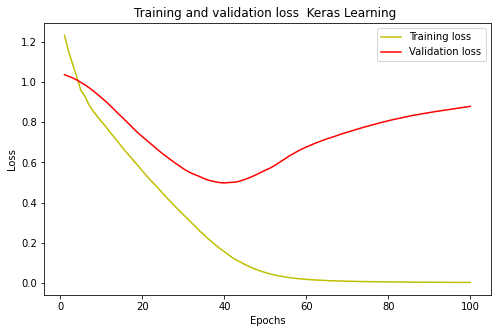

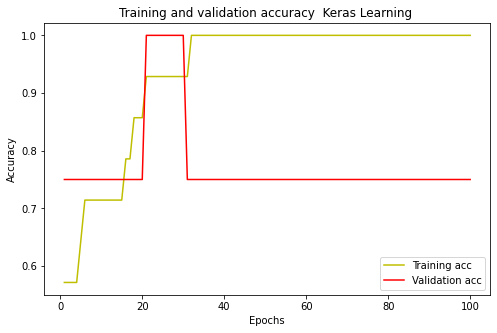

 Keras Learning Accuracy Train: 100.00 %, Accuracy Test: 75.00 %
Test loss: 0.1353168934583664

Test accuracy: 0.875


In [19]:
# seu código

# Neural net config
model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])]) 

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model
model.summary()

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Plot training
loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

# Final Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])


**Q4**. Analise a quantidade de parâmetros (pesos) do seu modelo. 

**Q5**. Repita algumas execuções do modelo (no mínimo 10). O que você pode melhor dizer sobre o resultado obtido no conjunto de teste? 

## Faça uma predição

Empregue um dos modelos com melhores resultados das execuções anteriores e faça a predição dos casos médios de cada cluster (você poderia usar os centróides neste caso não?).

**Q6.** Analise os resultados. 


In [20]:
model.predict( centroids )


1/1 [==============================] - 0s 339ms/step


array([[9.9244493e-01, 2.9429437e-03, 4.6121557e-03],
       [4.9713132e-04, 9.9878877e-01, 7.1419630e-04],
       [2.5218830e-03, 2.5373707e-03, 9.9494076e-01]], dtype=float32)